In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [7]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
df.drop('car_ID',axis=1,inplace=True)

In [11]:
del df['symboling']

In [12]:
del df['CarName']

**These are the important Categoric features That help us in predicting the price of the car. However most of the data willl be transformed to numeric for better results.**

In [13]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi


**And These are the important numeric Features that will help in predicting the price of the car **

In [14]:
int_df = df.select_dtypes(exclude=['object'].copy())
int_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


**The overall important features are :**

In [15]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [17]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [18]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [19]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [20]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

##spelling correction

In [21]:
def rect(col):
  if (col=='4wd'):
    col='rwd'
  return col  

In [22]:
df['drivewheel']= df['drivewheel'].apply(rect)

In [23]:
df['drivewheel'].value_counts()

fwd    120
rwd     85
Name: drivewheel, dtype: int64

In [24]:
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [25]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [26]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

**Data Cleaning and Transformation**

In [27]:
cleanup_nums = {"doornumber":     {"four": 4, "two": 2},
                "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

In [28]:
df = df.replace(cleanup_nums)
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,4,sedan,rwd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
def recarbod(cols):
  if (cols=='sedan'):
    cols=1
  elif (cols=='hatchback'):
    cols=2
  elif (cols=='hardtop'):
    cols=3
  elif (cols=='wagon'):
    cols=4
  else:
    cols=5
  return cols        

In [30]:
df['carbody'] = df['carbody'].apply(recarbod)

In [31]:
cat_feats =['fueltype','aspiration','drivewheel','enginelocation','enginetype','fuelsystem']

In [32]:
df1 = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [33]:
df1.head()

,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,2,5,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,5,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,1,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,4,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   doornumber           205 non-null    int64  
 1   carbody              205 non-null    int64  
 2   wheelbase            205 non-null    float64
 3   carlength            205 non-null    float64
 4   carwidth             205 non-null    float64
 5   carheight            205 non-null    float64
 6   curbweight           205 non-null    int64  
 7   cylindernumber       205 non-null    int64  
 8   enginesize           205 non-null    int64  
 9   boreratio            205 non-null    float64
 10  stroke               205 non-null    float64
 11  compressionratio     205 non-null    float64
 12  horsepower           205 non-null    int64  
 13  peakrpm              205 non-null    int64  
 14  citympg              205 non-null    int64  
 15  highwaympg           205 non-null    int

our final data will be the df1 

Testing and Training the model


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
df1.columns

Index(['doornumber', 'carbody', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'fueltype_gas', 'aspiration_turbo',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [37]:
X = df1[['doornumber', 'carbody', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg','fueltype_gas', 'aspiration_turbo',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi']]
y = df1['price']       

In [38]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lm = LinearRegression()

In [41]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
pred = lm.predict(X_test)

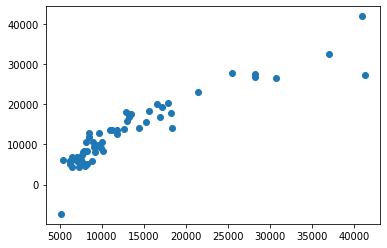

In [43]:
plt.scatter(y_test,pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


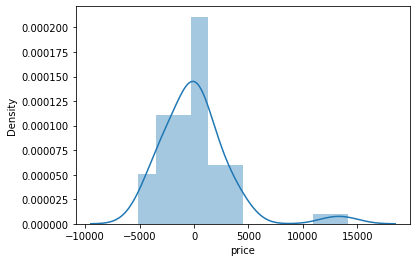

In [44]:
sns.distplot((y_test-pred))

In [45]:
from sklearn import metrics

In [46]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

3279.6402264919434